## Activity 3.1 - Bank customer segmentation

#### Therabank - Personal Loan
https://www.kaggle.com/krantiswalke/bank-personal-loan-modelling/notebooks

Steps - 
1. Import the necessary libraries for data processing, visualization and clustering
3. Load the data into a Pandas dataframe and display the top 5 rows.
2. Using the describe method, get a descriptive summary of the numerical columns in the data. Study the summary to understand the data better.
3. Perform standard scaling on the columns 'Income' and 'CCAvg'. We will be using these two variables for customer segmentation.
4. Get a descriptive summary of the processed columns to verify that the scaling has been applied correctly.
5. Perform k-means clustering  specifying 3 clusters using 'Income' and 'CCAvg' as the features. Specify random_state as 42.
6. Create a new column 'Cluster' containing the predicted cluster from the model.
7. Visualize the clusters by using different markers and colours for the clusters on a scatterplot between 'Income' and 'CCAvg'
8. Understanding the clusters - clusterin criterion:
 - Print the avg. values of Income and CCAvg for the three clusters
 - For a visual comparison, plot the avg values of 'Income_scaled' and 'CCAvg_scaled' for the clusters in a bar plot
9. Understanding the clusters - using other relevant features:**
 - Print the average values against the clusters for the features Age, Mortgage, Family, CreditCard, Online, Personal Loan
 - Which cluster has the highest propensity for taking a personal loan?
10. Based on your understanding of the clusters, assign descriptive lables for the clusters.

**1. Importing the necessary libaries**

In [30]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**2. Load the data into a Pandas dataframe and display the top 5 rows. Using the describe method, get a descriptive summary of the numerical columns in the data. Study the summary to understand the data better.**

In [50]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container {width:100% !important;}</style>"))

In [32]:
bank0 = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")
bank0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [33]:
bank0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**3. Perform standard scaling on the columns 'Income' and 'CCAvg' to create new columns 'Income_scaled' and 'CCAvg_scaled'. We will be using these two variables for customer segmentation. Get a descriptive summary of the processed columns to verify that the scaling has been applied correctly.**

In [34]:
scaler = StandardScaler()

bank0[['Income_scaled', 'CCAvg_scaled']] = scaler.fit_transform(bank0[['Income', 'CCAvg']])

bank0[['Income_scaled', 'CCAvg_scaled']].describe()

,Income_scaled,CCAvg_scaled
count,5.000000e+03,5.000000e+03
mean,1.939449e-16,-2.078338e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


**4. Perform k-means clustering  specifying 3 clusters using 'Income' and 'CCAvg' as the features. Specify random_state as 42. Create a new column 'Cluster' containing the predicted cluster from the model.**

In [35]:
model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Income_scaled', 'CCAvg_scaled']
model.fit(bank0[cluster_cols])

bank0['Cluster'] = model.predict(bank0[cluster_cols])

**5. Visualize the clusters by using different markers and colours for the clusters on a scatterplot between 'Income' and 'CCAvg'**

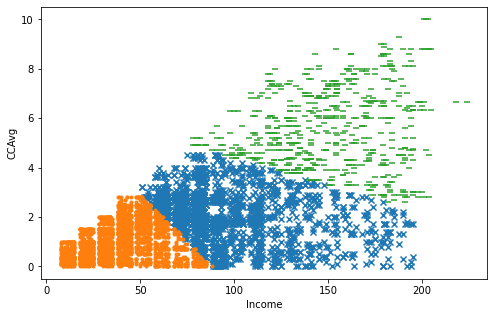

In [36]:
markers = ['x', '.', '_']

plt.figure(figsize=[8,5])
for clust in range(3):
    temp = bank0[bank0.Cluster == clust]
    plt.scatter(temp.Income, temp.CCAvg, marker=markers[clust])

plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.show()

**6. Understanding the clusters - clusterin criterion:**
 - Print the avg. values of Income and CCAvg for the three clusters
 - For a visual comparison, plot the avg values of 'Income_scaled' and 'CCAvg_scaled' for the clusters in a bar plot

In [37]:
bank0.groupby('Cluster')[['Income', 'CCAvg']].mean()

,Income,CCAvg
Cluster,,
0,97.052007,2.052301
1,39.589340,0.988508
2,150.781701,5.587705


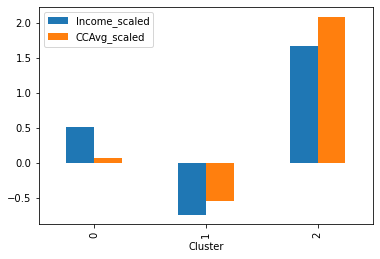

In [14]:
bank0.groupby('Cluster')[['Income_scaled', 'CCAvg_scaled']].mean().plot.bar()
plt.show()

**7. Understanding the clusters - using other relevant features:**
 - Print the average values against the clusters for the features Age, Mortgage, Family, CreditCard, Online, Personal Loan
 - Which cluster has the highest propensity for taking a personal loan?

In [38]:
sel_cols = ['Income', 'CCAvg', 'Age', 'Mortgage', 'Family', 'CreditCard', 'Online', 'Personal Loan']
bank0.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,
0,97.052007,2.052301,45.173544,65.582250,2.349350,0.293951,0.598643,0.123799
1,39.589340,0.988508,45.822469,42.592025,2.516871,0.296012,0.594325,0.000000
2,150.781701,5.587705,43.780096,88.922953,2.025682,0.285714,0.601926,0.418941


**8. Based on your understanding of the clusters, assign descriptive lables for the clusters.**

Key differentiating features for the clusters are - 
- Income
- CCAvg
- Mortgage

Some basic labels for these clusters can be - 

* Cluster 0: Average Joes (medium income, medium spend)
* Cluster 1: Low spend potential
* Cluster 2: High income spenders

## Activity 3.2 - Bank customer segmentation using many dimensions

**Steps -** 
1. Create a copy of the dataset named 'bank_scaled', and on it perform standard scaling of the following columns - 
     - 'Income', 'CCAvg', 'Age', 'Experience', 'Mortgage'
2. Get a descriptive summary of the processed columns to verify that the scaling has been applied correctly.
3. Perform k-means clustering  specifying 3 clusters using the scaled features. Specify random_state as 42.
4. Using PCA on the scaled columns, create new columns 'pc1' and 'pc2' containing the data for PC1 and PC2 respectively.
5. Visualize the clusters by using different markers and colours for the clusters on a scatterplot between 'pc1' and 'pc2'
6. Understanding the clusters - clustering criterion:
 - Print the avg. values of the features used for clustering against the three clusters
 - Which features are the most differentiated for the clusters?
7. Understanding the clusters - using other relevant features:**
 - Print the average values against the clusters for the features Age, Mortgage, Family, CreditCard, Online, Personal Loan
 - Which cluster has the highest propensity for taking a personal loan?
8. Based on your understanding of the clusters, assign descriptive lables for the clusters.

#### Solution
**1. Create a copy of the dataset named 'bank_scaled', and on it perform standard scaling of the following columns -**  
- **'Income', 'CCAvg', 'Age', 'Experience', 'Mortgage'**

In [41]:
bank_scaled = bank0.copy()

cluster_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage']

bank_scaled[cluster_cols] = scaler.fit_transform(bank_scaled[cluster_cols])

**2. Get a descriptive summary of the processed columns to verify that the scaling has been applied correctly.**

In [42]:
bank_scaled[cluster_cols].describe()

,Income,CCAvg,Age,Experience,Mortgage
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.939449e-16,-2.078338e-17,2.478018e-17,-1.693312e-16,2.810197e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00,-1.948906e+00,-2.014911e+00,-5.555239e-01
25%,-7.554825e-01,-7.084116e-01,-9.019702e-01,-8.812043e-01,-5.555239e-01
50%,-2.123482e-01,-2.506106e-01,-2.952359e-02,-9.121982e-03,-5.555239e-01
75%,5.263146e-01,3.216407e-01,8.429230e-01,8.629604e-01,4.375576e-01
max,3.263712e+00,4.613525e+00,1.889859e+00,1.996667e+00,5.688108e+00


**3. Perform k-means clustering  specifying 3 clusters using the scaled features. Specify random_state as 42.**

In [43]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(bank_scaled[cluster_cols])

bank_scaled['Cluster'] = model.predict(bank_scaled[cluster_cols])

**4. Using PCA on the scaled columns, create new columns 'pc1' and 'pc2' containing the data for PC1 and PC2 respectively.**

In [44]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(bank_scaled[cluster_cols])

bank_scaled['pc1'] = pca_res[:,0]
bank_scaled['pc2'] = pca_res[:,1]

**5. Visualize the clusters by using different markers and colours for the clusters on a scatterplot between 'pc1' and 'pc2'**

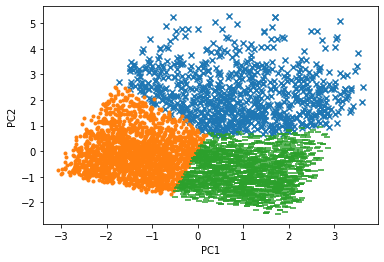

In [47]:
markers = ['x', '.', '_']

for clust in range(3):
    temp = bank_scaled[bank_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**6. Understanding the clusters - clustering criterion:**
 - **Print the avg. values of the features used for clustering against the three clusters**
 - **Which features are the most differentiated for the clusters?**

In [48]:
bank0['Cluster'] = bank_scaled.Cluster

bank0.groupby('Cluster')[cluster_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage
Cluster,,,,,
0,147.650185,4.856403,43.672435,18.644005,116.279357
1,58.941774,1.367514,55.536044,30.233826,45.134935
2,60.124322,1.382121,35.116428,9.873705,44.771584


**7. Understanding the clusters - using other relevant features:**
 - **Print the average values against the clusters for the features Age, Mortgage, Family, CreditCard, Online, Personal Loan**
 - **Which cluster has the highest propensity for taking a personal loan?**

In [49]:
sel_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage', 'Family', 'CreditCard', 'Online', 'Personal Loan']

bank0.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Experience,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,,
0,147.650185,4.856403,43.672435,18.644005,116.279357,2.002472,0.299135,0.613103,0.398022
1,58.941774,1.367514,55.536044,30.233826,45.134935,2.397874,0.300370,0.604898,0.039741
2,60.124322,1.382121,35.116428,9.873705,44.771584,2.552047,0.285150,0.581648,0.035520


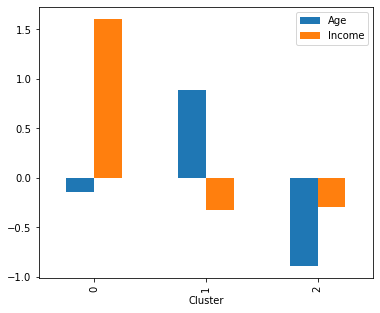

In [199]:
bank_scaled.groupby('Cluster')[['Age', 'Income']].mean().plot.bar(figsize=[6,5])
plt.show()

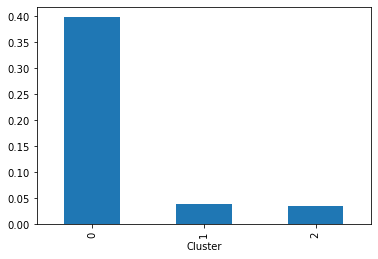

In [203]:
bank_scaled.groupby('Cluster')['Personal Loan'].mean().plot.bar()
plt.show()

Clusters are different on different parameters. But it looks like the clusters 1 and 2 have very similar propensity to go for a personal loan.

**8. Based on your understanding of the clusters, assign descriptive lables for the clusters.**

Key differentiating features for the clusters are - 
- Age
- Income, CCAvg, Mortgage follow similar patterns for the clusters

Some basic labels for these clusters can be - 

* Cluster 0: Middle aged spenders (high income, high spend)
* Cluster 1: Old low spend potential
* Cluster 2: Young low spend potential